In [5]:
!pip install yfinance

     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
      --------------------------------------- 20.5/948.2 kB ? eta -:--:--
     ------ ------------------------------- 163.8/948.2 kB 3.3 MB/s eta 0:00:01
     ---------------------- --------------- 573.4/948.2 kB 5.2 MB/s eta 0:00:01
     ------------------------------------ - 901.1/948.2 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/102.2 kB ? eta -:--:--
   ---------------------------------------- 102.2/102.2 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Create portfolio for the given stocks: Google, amazon and tesla for the last 10 years.

In [33]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

stocks = ['GOOGL', 'AMZN', 'TSLA']
start_date = '2013-01-01'
end_date = '2023-01-01'

data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

returns = data.pct_change().dropna()
returns.head()

[*********************100%***********************]  3 of 3 completed


Ticker,AMZN,GOOGL,TSLA
Date,,,
2013-01-03,0.004547,0.000581,-0.016685
2013-01-04,0.002592,0.019760,-0.010642
2013-01-07,0.035925,-0.004363,-0.001744
2013-01-08,-0.007748,-0.001973,-0.019220
2013-01-09,-0.000113,0.006573,-0.001187


#### 2. Visualize the expected returns on the 10 years series.

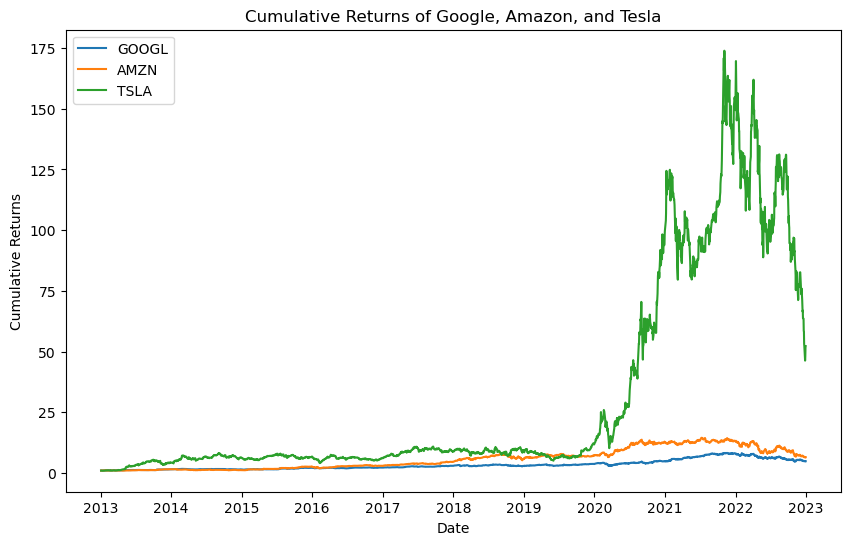

In [6]:
#cumulative returns
cumulative_returns = (1 + returns).cumprod()

plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.title('Cumulative Returns of Google, Amazon, and Tesla')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


#### 3. Evaluate the annual daily mean return, correlation, Sharpe ratio and daily standard mean return.

In [8]:
# Annual mean return
annual_mean_return = returns.mean() * 252
print("Annual Mean Return:\n", annual_mean_return)

Annual Mean Return:
 Ticker
AMZN     0.240931
GOOGL    0.195105
TSLA     0.558743
dtype: float64


In [12]:
import seaborn as sns

<Axes: xlabel='Ticker', ylabel='Ticker'>

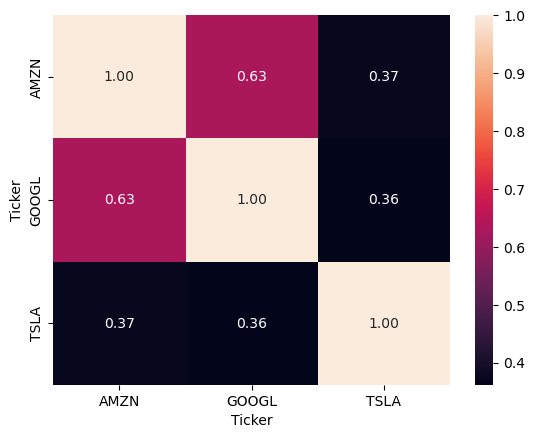

In [13]:
# Correlation matrix
correlation = returns.corr()
sns.heatmap(correlation,annot=True,fmt='.2f')
#print("Correlation Matrix:\n", correlation)

- Google and Amazone has good correlation

<Axes: xlabel='Ticker'>

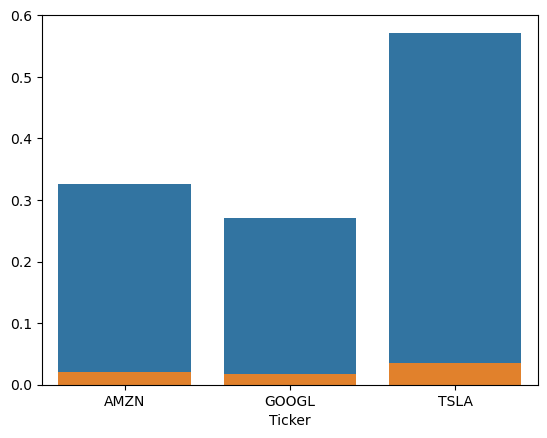

In [16]:
# Daily standard deviation
daily_std = returns.std()
annual_std = daily_std * np.sqrt(252)


sns.barplot(annual_std)
sns.barplot(daily_std)
#plt.annotate(["Blue: annual_std","Orange: Daily_std"],xy=[1,1])

In [18]:
# Sharpe ratio (assuming risk-free rate is 0)
sharpe_ratio = annual_mean_return / annual_std
print("Sharpe Ratio:\n", sharpe_ratio)

Sharpe Ratio:
 Ticker
AMZN     0.738806
GOOGL    0.720616
TSLA     0.977170
dtype: float64


#### 4. Formulate the Markowitz frontier.

In [35]:
#Function to calculate portfolio return
def portfolioreturn(weights):
    return np.dot(returns.mean(),weights)*252

# To calculate Profile Standard Deviation
def portfoliostd(weights):
    return (np.dot(np.dot(returns.cov(),weights),weights))**(1/2)*np.sqrt(252)

# This will Generate random weights
def weightscreator(returns):
    rand = np.random.random(len(returns.columns))
    rand /= rand.sum()
    return rand

#### Creating A Function to find Returns and Standard Deviation for Randoms Weights

In [37]:
Nreturns = []
stds = []
w = []

for i in range(1000): #Use the number of iterations you seem fit
    weights = weightscreator(returns)
    Nreturns.append(portfolioreturn(weights))
    stds.append(portfoliostd(weights))
    w.append(weights)

### Matplotlib To Plot The Efficient Frontier

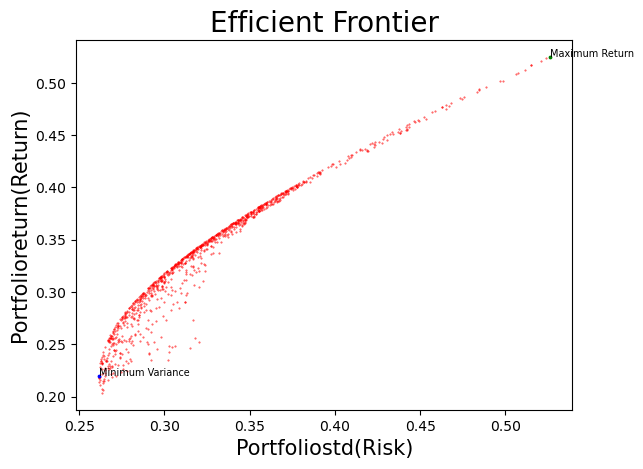

<Figure size 3000x2000 with 0 Axes>

In [40]:
plt.scatter(stds,Nreturns,c="red",s=0.2,alpha=0.75) #Customise size according to number of iterations being plotter
plt.scatter(stds[Nreturns.index(max(Nreturns))], max(Nreturns),c = "green", s=3) #Customise size for this too
plt.text(stds[Nreturns.index(max(Nreturns))],max(Nreturns),"Maximum Return", fontsize=7) #Customise font size for this too
plt.scatter(min(stds),Nreturns[stds.index(min(stds))] ,c = "blue", s=3) #Customise size for this too
plt.text(min(stds),Nreturns[stds.index(min(stds))],"Minimum Variance", fontsize=7) #Customise font size for this too
plt.title("Efficient Frontier", fontsize = 20)
plt.xlabel("Portfoliostd(Risk)", fontsize = 15)
plt.ylabel("Portfolioreturn(Return)", fontsize = 15)
plt.figure(figsize=(30,20))
plt.show()

#### 5. Discuss on the optimal portfolio and the different parameters evaluated for the portfolio.(Assuming Greater Return of investment)

- Compute max return and its associated risk

- Compute MIN STD and its associated return

- Compute a range return less than max and grater than min and its associated risk also, provide index of the weights

In [44]:
print("Max return =", max(Nreturns))
print("Corresponding Standard Deviation =", stds[Nreturns.index(max(Nreturns))])

Max return = 0.5248550491816526
Corresponding Standard Deviation = 0.5260273050408101


In [46]:
for i in range(1000000): #Use the number of iterations you seem fit
    weights = weightscreator(returns)
    if (portfolioreturn(weights) >= max(Nreturns)):
        weight_new = weights
        print("Your Efficient Portfolio is:",weight_new) #Returns portfolio weights for above condition being satisfied
        break

Your Efficient Portfolio is: [0.08885219 0.01083735 0.90031046]


In [48]:
print("Returns corresponding to weights found :",portfolioreturn(weight_new)) #Prints return of found weights
print("Risk associated with weights found :",portfoliostd(weight_new)) #Prints Risk of found weights

Returns corresponding to weights found : 0.5265640572284616
Risk associated with weights found : 0.5274504960144901
